In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("fear_greed_index.csv")

df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [ ]:
df.shape

(2644, 4)

In [ ]:
df["date"].unique()

array(['2018-02-01', '2018-02-02', '2018-02-03', ..., '2025-04-30',
       '2025-05-01', '2025-05-02'], dtype=object)

In [ ]:
print(df.head(3))
print(df.info())
print(df.describe)

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
<bound method NDFrame.describe of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...    

In [ ]:
print(df.head(3))

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [ ]:
df["date"] = pd.to_datetime(df["date"])

<function matplotlib.pyplot.show(close=None, block=None)>

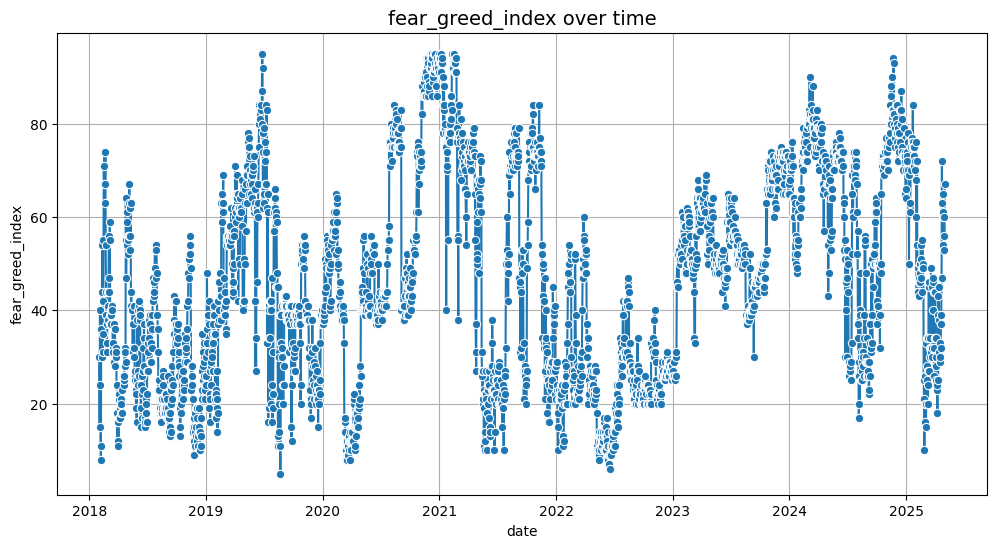

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = "date", y= "value", data= df, marker = "o")
plt.title("fear_greed_index over time", fontsize = 14)
plt.xlabel("date")
plt.ylabel("fear_greed_index")
plt.grid(True)
plt.show

X-axis date: Represents the timeline from 2018 to 2025.  
Y-axis fear_greed_index: Represents the sentiment index ranging from 0 to 100.  
Lower values closer to 0 indicate Extreme Fear.  
Higher values closer to 100 indicate Extreme Greed.  

Observation:  
The index fluctuates heavily over time, reflecting shifting market sentiment cycles.  
Periods of high peaks indicate phases of strong investor optimism and greed.  
Periods of sharp drops represent fear-driven market conditions.  
The data suggests repeating cycles of fear and greed, aligning with major market ups and downs across years.



/tmp/ipython-input-3192865826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = "classification", data = df, order = df["classification"].value_counts().index, palette = "coolwarm")


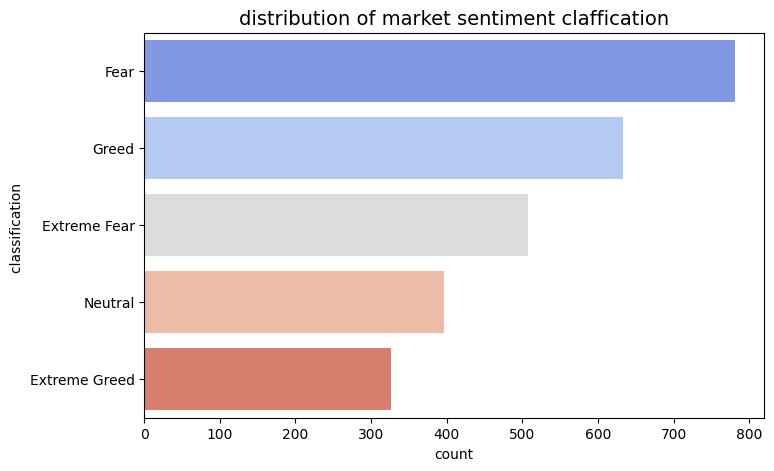

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(y = "classification", data = df, order = df["classification"].value_counts().index, palette = "coolwarm")
plt.title("distribution of market sentiment claffication", fontsize = 14)
plt.xlabel("count")
plt.ylabel("classification ")
plt.show()

Fear : has the highest frequency, meaning that in most observations the market sentiment was dominated by fear.

Greed : also has a significant presence but is lower than fear showing that optimism exists but is less frequent.

Extreme Fear : occurs quite often indicating periods when investors were highly risk-averse.

Neutral sentiment appears moderately, suggesting that the market sometimes shows balanced or indecisive behavior.

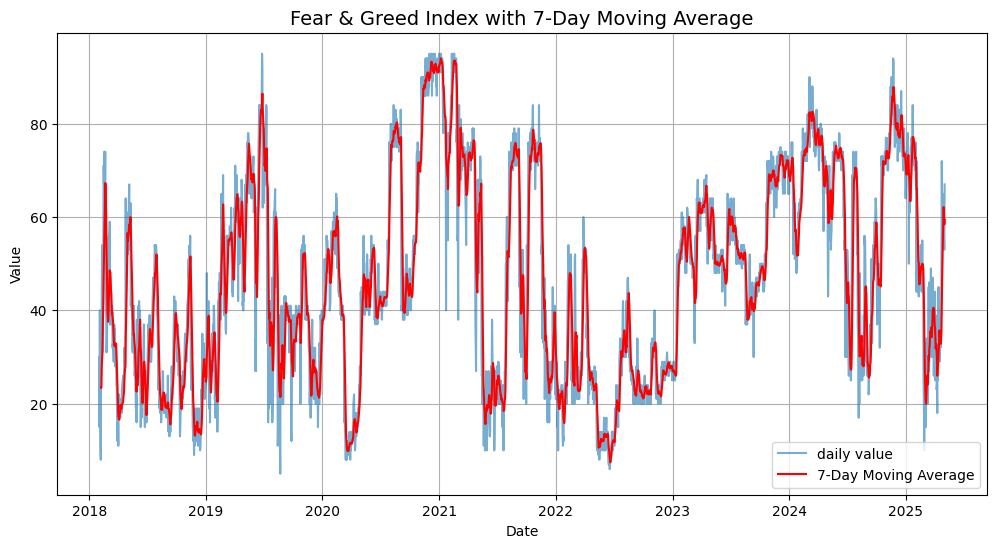

In [ ]:
df["MA_7"]=df["value"].rolling(window=7).mean()
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["value"], label = "daily value", alpha=0.6)
plt.plot(df['date'], df['MA_7'], label='7-Day Moving Average', color='red')
plt.title("Fear & Greed Index with 7-Day Moving Average", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

The daily values blue are highly volatile showing short-term fluctuations in market sentiment.

The 7-day moving average red smooths out these short-term variations, making it easier to observe overall sentiment trends.

We can see recurring cycles of fear and greed, where the index moves between low values extreme fear and high values extreme greed.

Periods such as 2020-2021 show strong spikes in greed, while other times example, mid-2022 and early 2025 are dominated by fear.

Correlation Matrix:
        value
value    1.0


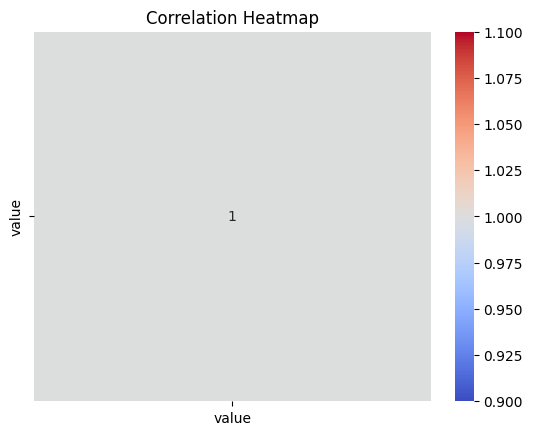

In [ ]:
corr = df[['value']].corr()
print("Correlation Matrix:\n", corr)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Any variable compared with itself will always have a perfect correlation of 1.0.
